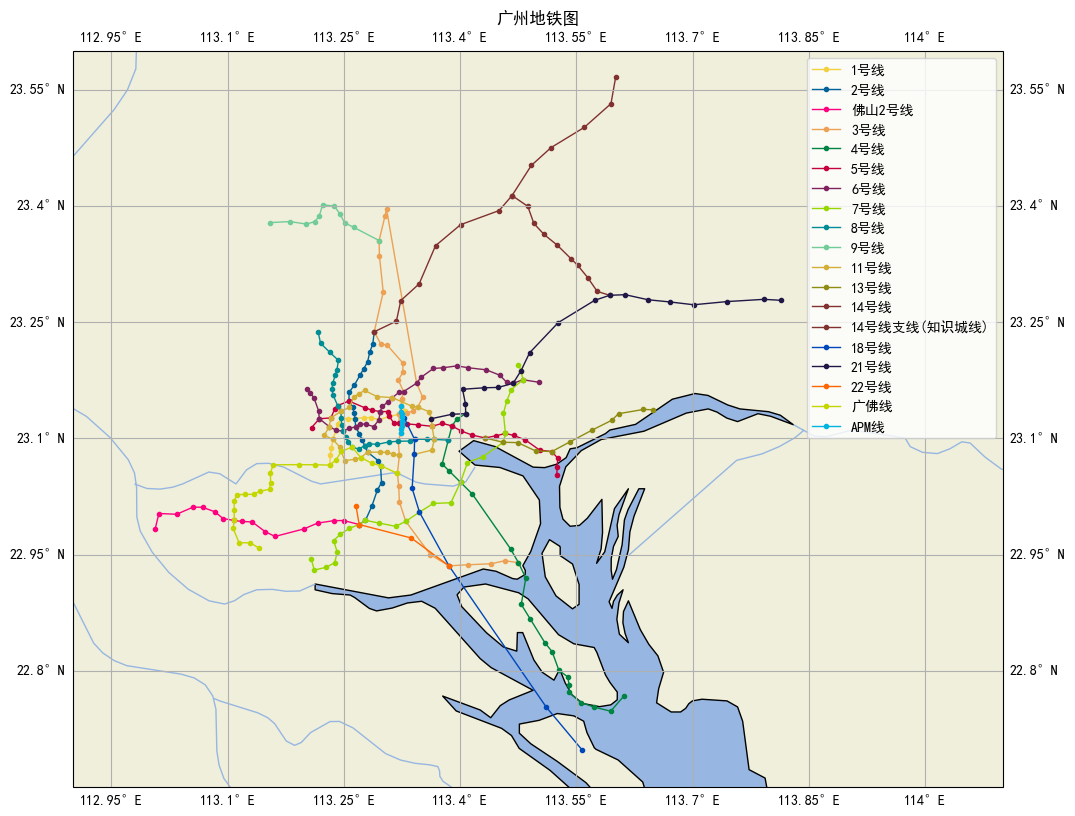

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 读取Excel文件
file_path = "广州.xlsx" 
df = pd.read_excel(file_path)

# 提取数据
longitudes = df.iloc[:, 4]  # 第五列是经度
latitudes = df.iloc[:, 5]  # 第六列是纬度
line_names = df.iloc[:, 8]  # 第九列是线路名称

# 创建地图
fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': ccrs.PlateCarree()})

# 设置地图范围（广州的大致经纬度范围）
ax.set_extent([112.9, 114.1, 22.65, 23.6], crs=ccrs.PlateCarree())

# 添加地理特征
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.RIVERS)

line_colors = {
    '1号线': '#B92318',  # 1号线红色
    '2号线': '#003366',  # 2号线蓝色
    '3号线': '#FF007F',  # 3号线橙色
    '4号线大兴线': '#009B77',  # 4号线绿色
    '5号线': '#A349A4',  # 5号线紫色
    '6号线': '#FF7F27',  # 6号线橙色
    '7号线': '#FFC90E',  # 7号线黄色
    '8号线': '#00A2E8',  # 8号线天蓝色
    '9号线': '#B5E61D',  # 9号线浅绿色
    '10号线': '#00A2E8',  # 10号线天蓝色
    '11号线': '#FFA07A', # 11号线西柚色
    '12号线': '#A0522D', # 12号线棕褐色
    '13号线': '#F26522',  # 13号线橙色
    '14号线': '#D9A0A0',  # 14号线浅红色
    '15号线': '#663399',  # 15号线深紫色
    '16号线': '#669933',  # 16号线深绿色
    '17号线': '#00CED1',  # 17号蓝绿色
    '17号线北段': '#00CED1',  # 17号蓝绿色
    '八通线': '#B92318',  # 八通线红色
    '昌平线': '#FFC0CB',  # 昌平线粉红色
    '大兴国际机场线': '#009B77',  # 大兴线绿色
    '房山线': '#CC5500',  # 房山线橙色
    '机场线': '#B3B3E2',  # 机场线淡紫色
    '西郊线': '#FF0000',  # 西郊线红色
    '亦庄线': '#FF1493',  # 亦庄线粉红色
    '燕房线': '#FF7F27',  # 燕房线橙色
    'S1号线': '#8B4513',  # S1号线棕色
}

line_colors = {
    '1号线': '#f3d03e',  # 1号线黄色
    '2号线': '#00629b',  # 2号线蓝色
    '佛山2号线': '#FF007F',  # 佛山2号线玫瑰红色
    '3号线': '#eca154',  # 3号线橙色
    '4号线': '#008443',  # 4号线绿色
    '5号线': '#c5003e',  # 5号线红色
    '6号线': '#80225f',  # 6号线紫色
    '7号线': '#97d700',  # 7号线浅绿色
    '8号线': '#008c95',  # 8号线深绿色
    '9号线': '#71cc98',  # 9号线浅绿色
    '11号线': '#D4AF37', # 11号线穗金色
    '13号线': '#8e8c13',  # 13号线橄榄色
    '14号线': '#81312f',  # 14号线棕色
    '14号线支线(知识城线)': '#81312f',  # 14号线支线棕色
    '18号线': '#0047ba',  # 18号线蓝色
    '21号线': '#201747',  # 21号线深蓝色
    '22号线': '#FF6600', # 22号线活力橙色
    '广佛线': '#c4d600',  # 广佛线黄色
    'APM线': '#00b5e2',  # APM线浅蓝色
}

# 绘制地铁线路
for line_name, color in line_colors.items():
    # 筛选当前线路的站点
    line_data = df[df.iloc[:, 8] == line_name]
    lons = line_data.iloc[:, 4]  # 经度
    lats = line_data.iloc[:, 5]  # 纬度
    #if line_name not in ['5号线1', '10号线1']:  # 跳过5号线1和10号线1的标签
    ax.plot(lons, lats, marker='o', color=color, label=line_name, markersize=3, linewidth=1)
    #else:
    #ax.plot(lons, lats, marker='o', color=color, markersize=3, linewidth=1)  

# 添加图例
ax.legend(loc='upper right')

# 添加网格线
ax.gridlines(draw_labels=True)

# 显示地图
plt.title('广州地铁图')
plt.savefig("guangzhou.jpg", dpi = 300)
plt.show()